In [0]:
import numpy as np
import pandas as pd
import csv
import re

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm

In [0]:
def preprocess(text):
    text = text.lower()
    text = ''.join(re.findall(r'[ а-я]', text))
    return text.split()

In [0]:
!wget -O twitter.csv https://uc50020370813238463df9d35e95.dl.dropboxusercontent.com/cd/0/get/AjfSu2b_x8ZcTuTnG6iVRzB9oGghFHdSGRDoYTvbkYZvzzqC9Mba1Ws-OUyM161AHw1RXT7bMbkTM5Sz25q1crgc96XT16jcAExTWAoRXfDDSw/file?_download_id=788121070783183678205644949107825940683652681256154673210469668&_notify_domain=www.dropbox.com&dl=1

tweets = []
    
try:
    reader = csv.reader(open('twitter.csv', 'r'), delimiter=';')
    for line in reader:
        line = preprocess(line[3])
        if len(line) > 10:
            tweets.append(line)
except: # some bug with encoding in the end of file
    pass

tweets = tweets[:5000]

--2019-08-24 11:45:24--  https://uc50020370813238463df9d35e95.dl.dropboxusercontent.com/cd/0/get/AjfSu2b_x8ZcTuTnG6iVRzB9oGghFHdSGRDoYTvbkYZvzzqC9Mba1Ws-OUyM161AHw1RXT7bMbkTM5Sz25q1crgc96XT16jcAExTWAoRXfDDSw/file?_download_id=788121070783183678205644949107825940683652681256154673210469668
Resolving uc50020370813238463df9d35e95.dl.dropboxusercontent.com (uc50020370813238463df9d35e95.dl.dropboxusercontent.com)... 162.125.9.6, 2620:100:601f:6::a27d:906
Connecting to uc50020370813238463df9d35e95.dl.dropboxusercontent.com (uc50020370813238463df9d35e95.dl.dropboxusercontent.com)|162.125.9.6|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-08-24 11:45:24 ERROR 404: Not Found.



In [0]:
!wget -O tolstoy.zip https://royallib.com/get/txt/tolstoy_lev/voyna_i_mir_tom_1.zip
!unzip tolstoy.zip
!mv "Толстой Лев. Война и мир. Том 1 - royallib.ru.txt" tolstoy.txt

tolstoy = []

with open('tolstoy.txt', 'r', encoding="windows-1251") as file:
    for line in file:
        line = preprocess(line)
        if len(line) > 10:
            tolstoy.append(line)

--2019-08-24 11:45:32--  https://royallib.com/get/txt/tolstoy_lev/voyna_i_mir_tom_1.zip
Resolving royallib.com (royallib.com)... 62.210.206.157
Connecting to royallib.com (royallib.com)|62.210.206.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘tolstoy.zip’

tolstoy.zip             [ <=>                ]      14  --.-KB/s    in 0s      

2019-08-24 11:45:33 (2.97 MB/s) - ‘tolstoy.zip’ saved [14]

Archive:  tolstoy.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of tolstoy.zip or
        tolstoy.zip.zip, and cannot find tolstoy.zip.ZIP, period.
mv: cannot stat 'Толстой Лев. Война и мир. Том 1 - royallib.ru.txt': No such file or directory


FileNotFoundError: ignored

In [0]:
import urllib.request
from bs4 import BeautifulSoup

def get_page(url):
    page = urllib.request.urlopen(url).read().decode('utf-8')
    soup = BeautifulSoup(page, 'html.parser')
    return soup

def parse_2ch():
    posts = get_page('https://2ch.hk/b/').select('.post_type_oppost a')
    
    links = set()
    for post in posts:
        idx = post.get('id')
        if isinstance(idx, str):
            links.add(idx)
            
    messages = [] не
    for idx in tqdm(links):
        print(idx)
        raw_messages = get_page(f'https://2ch.hk/b/res/{idx}.html').select('.post__message')
        for message in raw_messages:
            message = preprocess(message.text)
            if len(message) > 10:
                messages.append(message)
    
    return messages

dwach = parse_2ch()

  0%|          | 0/22 [00:00<?, ?it/s]

198816393


  5%|▍         | 1/22 [00:01<00:26,  1.27s/it]

198818719


  9%|▉         | 2/22 [00:03<00:30,  1.53s/it]

198812550


 14%|█▎        | 3/22 [00:04<00:26,  1.39s/it]

198817348


 18%|█▊        | 4/22 [00:05<00:24,  1.34s/it]

198808038


 23%|██▎       | 5/22 [00:06<00:21,  1.25s/it]

198796013


 27%|██▋       | 6/22 [00:09<00:25,  1.61s/it]

198818834


 32%|███▏      | 7/22 [00:10<00:21,  1.45s/it]

198820812


 36%|███▋      | 8/22 [00:11<00:18,  1.32s/it]

198790254


 41%|████      | 9/22 [00:12<00:18,  1.39s/it]

198816207


 45%|████▌     | 10/22 [00:14<00:18,  1.50s/it]

198758640


 50%|█████     | 11/22 [00:16<00:16,  1.50s/it]

198808921


 55%|█████▍    | 12/22 [00:17<00:13,  1.36s/it]

198820513


 59%|█████▉    | 13/22 [00:18<00:11,  1.27s/it]

198812723


 64%|██████▎   | 14/22 [00:19<00:10,  1.28s/it]

198802024


 68%|██████▊   | 15/22 [00:20<00:09,  1.30s/it]

198820052


 73%|███████▎  | 16/22 [00:21<00:07,  1.26s/it]

198802952


 77%|███████▋  | 17/22 [00:23<00:07,  1.42s/it]

198811156


 82%|████████▏ | 18/22 [00:24<00:05,  1.31s/it]

198819175


 86%|████████▋ | 19/22 [00:25<00:03,  1.23s/it]

198819701


 91%|█████████ | 20/22 [00:27<00:02,  1.29s/it]

198816835


 95%|█████████▌| 21/22 [00:28<00:01,  1.23s/it]

198820913


100%|██████████| 22/22 [00:29<00:00,  1.16s/it]


In [0]:
class Vocab:
    def __init__(self, corpora, tokenizer, max_len=20, vocab_size=5000):
        self.tokenizer = tokenizer
        self.max_len = max_len
        
        counts = {}
        
        for sentence in corpora:
            for token in sentence:
                counts[token] = counts.get(token, 0) + 1
        
        l = sorted(counts.items(), key=lambda x: -x[1])[:vocab_size-2]
        
        print('least used token:', l[-1])
        print('vocab size:', len(l), '(+2)')
        
        self.t2i = {"<pad>" : 0, "<unk>" : 1}
        self.i2t = {0 : "<pad>", 1 : "<unk>"}
              
        for token, _ in l:
            self.i2t[len(self.i2t)] = token
            self.t2i[token] = len(self.t2i)
    
    def tokenize(self, sentence, pad=True):
        if pad:
            sentence = sentence[:self.max_len]
            while len(sentence) < self.max_len:
                sentence.append('<pad>')
        
        indices = []
        for token in sentence:
            if token in self.t2i:
                indices.append(self.t2i[token])
            else:
                indices.append(1)
        
        return indices

In [0]:
# me: mom can we have oversampling?
# mom: but we have oversampling at home
# oversampling at home:

dataset_a = tweets
dataset_b = tolstoy + tolstoy
dataset_c = dwach + dwach + dwach + dwach

print(len(dataset_a))
print(len(dataset_b))
print(len(dataset_c))

vocab = Vocab(dataset_a + dataset_b + dataset_c, preprocess)

5000
4386
4240
least used token: ('купите', 8)
vocab size: 4998 (+2)


In [0]:
class StyleDataset(Dataset):
    def __init__(self, corpora, vocab):
        self.vocab = vocab
        self.samples = []
        self.labels = []
        
        for i, dataset in enumerate(corpora):
            self.samples += dataset
            self.labels += [i] * len(dataset)
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        X = self.vocab.tokenize(self.samples[idx])
        y = [self.labels[idx]] * len(X)
        return torch.LongTensor(X), torch.LongTensor(y)

In [0]:
dataset = StyleDataset([dataset_a, dataset_b, dataset_c], vocab)

# todo: this should be done before oversampling
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [len(dataset)-512, 512])

train = DataLoader(train_dataset, batch_size=64, shuffle=True)
test = DataLoader(test_dataset, batch_size=64)

dataset[5]

(tensor([  15,   56,   52,    1,   49,  416, 1064,    4,   86,    4,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [0]:
def fetch_embeddings(embeddings, vocab, embedding_dim=300):
    weights = torch.randn(len(vocab.t2i), embedding_dim) / 10
    
    print('reading file', embeddings)
    print('this may take a while...')
    
    with open(embeddings) as file:
        for line in file:
            data = line.split()
            if len(data) == embedding_dim + 1:
                token = data[0]
                vector = torch.Tensor([float(x) for x in data[1:]])
                if token in vocab.t2i:
                    weights[vocab.t2i[token]] = vector
    
    return weights


class StyleClassifier(nn.Module):
    def __init__(
        self,
        embeddings,
        embedding_dim=300,
        num_classes=3,
        hidden_dim=50,
        num_layers=1,
        rnn_dropout=0,
        bidirectional=False):
        
        super().__init__()
        
        self.embed = nn.Embedding.from_pretrained(embeddings)
        
        self.rnn = nn.GRU(
            embedding_dim,
            hidden_dim, 
            num_layers=num_layers, 
            bidirectional=bidirectional, 
            dropout=rnn_dropout,
            batch_first=True
        )
        
        self.head = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_dim, num_classes),
            nn.LogSoftmax(dim=2)
        )
        
    def forward(self, X):
        X = self.embed(X)
        X, _ = self.rnn(X)
        X = self.head(X)
        return X

In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ru.vec

In [0]:
!touch empty.vec

In [0]:
embeddings = fetch_embeddings('wiki.ru.vec', vocab, embedding_dim=300)
model = StyleClassifier(embeddings)

reading file wiki.ru.vec
this may take a while...


In [0]:
test_batch = dataset[0][0].view(1, -1)
model(test_batch).exp()

In [0]:
lr = 5e-2
num_epochs = 10
device = torch.device('cpu')

#model = StyleClassifier(len(vocab.i2t), 'fasttext.vec')
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.NLLLoss()

In [0]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    
    for X, y in tqdm(train):
        X.to(device)
        y.to(device)
        
        optimizer.zero_grad()
        
        preds = model(X)
        
        loss = criterion(preds.view(-1, 3), y.view(-1))
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
    
    test_loss = 0
    for X, y in tqdm(test):
        X.to(device)
        y.to(device)
        
        preds = model(X)
        loss = criterion(preds.view(-1, 3), y.view(-1))
        
        test_loss += loss.item()
    
    test_losses.append(test_loss)
    print('test loss:', test_loss)

  3%|▎         | 6/205 [00:00<00:03, 56.48it/s]

test loss: 7.133387565612793


  3%|▎         | 6/205 [00:00<00:03, 55.36it/s]

test loss: 6.880126178264618


  3%|▎         | 6/205 [00:00<00:03, 59.38it/s]

test loss: 7.078477621078491


  3%|▎         | 6/205 [00:00<00:03, 55.75it/s]

test loss: 7.423617303371429


  2%|▏         | 5/205 [00:00<00:04, 47.48it/s]

test loss: 6.754110515117645


  3%|▎         | 6/205 [00:00<00:03, 59.28it/s]

test loss: 9.674750685691833


  3%|▎         | 6/205 [00:00<00:03, 57.08it/s]

test loss: 8.494768857955933


  3%|▎         | 6/205 [00:00<00:03, 57.76it/s]

test loss: 8.512402176856995


  3%|▎         | 6/205 [00:00<00:03, 56.66it/s]

test loss: 8.356951236724854


100%|██████████| 8/8 [00:00<00:00, 128.16it/s]

test loss: 8.018276393413544


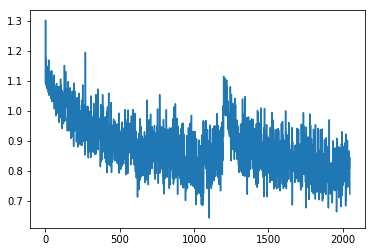

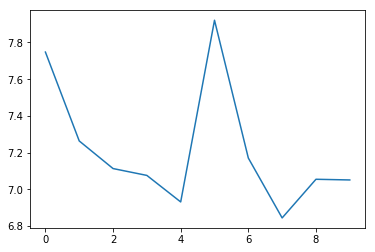

In [0]:
plt.plot(train_losses)
plt.show()

plt.plot(test_losses)
plt.show()

In [0]:
from IPython.core.display import display, HTML

def print_colored(sequence, intensities, delimeter=' '):
    html = delimeter.join([
        # https://en.wikipedia.org/wiki/Subtractive_color
        f'<span style="background: rgb({255*(1-x[1]-x[2])}, {255*(1-x[0]-x[2])}, {255*(1-x[0]-x[1])})">{c}</span>'
        for c, x in zip(sequence, intensities) 
    ])
    display(HTML(html))

In [0]:
samples = [
    'Сап б, есть одна тян. Двачую анон',
    'князь болконский с удивлением увидел',
    'засмеялся проиграл тред не нашел создал',
    'хахаха ну ты даешь',
    'Сап двач, есть одна хэштег тян, она как будто со вниманием слушала рассказ князя Василья',
    ' '.join(dataset_a[111]), # Твиттер, должен быть красным
    ' '.join(dataset_b[111]), # Война и Мир, должна быть зелёнойхз
    ' '.join(dataset_c[333]), # Двач, должен быть синим
    ' '.join(dataset_a[5] + dataset_b[5] + dataset_c[5])
]

model = model.cpu()

t = 1 # температура, для лучшей визуализации

for sample in samples:
    sentence = preprocess(sample)
    X = torch.LongTensor(vocab.tokenize(sample, pad=False)).view(-1, 1)
    scores = model(X).view(-1, 3).mul(t).softmax(dim=1)
    maxes, _ = torch.max(scores, dim=1)
    scores -= ((1-maxes)/2).view(-1, 1) # так будет ровно один "полный" цвет
    print(scores)
    print_colored(sentence, scores)

tensor([[ 0.0940, -0.0940,  0.1198],
        [ 0.0351, -0.0351,  0.0529],
        [ 0.0237, -0.0237,  0.0499],
        [ 0.0402, -0.0402,  0.1847],
        [ 0.0365, -0.0315,  0.0315],
        [ 0.1051, -0.1051,  0.1755],
        [ 0.2059, -0.0772,  0.0772],
        [ 0.1237, -0.0177,  0.0177],
        [ 0.0360, -0.0360,  0.0822],
        [-0.0205,  0.0205,  0.0497],
        [ 0.0970, -0.0429,  0.0428],
        [ 0.0950, -0.0950,  0.1127],
        [ 0.0264,  0.0751, -0.0264],
        [ 0.0453, -0.0453,  0.0895],
        [ 0.0158, -0.0158,  0.7854],
        [ 0.0698, -0.0237,  0.0237],
        [ 0.0505, -0.0348,  0.0348],
        [-0.0205,  0.0205,  0.0541],
        [ 0.2657,  0.0067, -0.0067],
        [ 0.0164, -0.0145,  0.0145],
        [ 0.2042, -0.0780,  0.0780],
        [ 0.0280, -0.0280,  0.1090],
        [ 0.0986, -0.0986,  0.1825],
        [ 0.0501, -0.0352,  0.0352],
        [ 0.0348, -0.0348,  0.0889],
        [ 0.0259, -0.0259,  0.0846],
        [ 0.0159, -0.0159,  0.0210],
 

tensor([[ 0.0274, -0.0274,  0.1644],
        [ 0.0249, -0.0249,  0.7810],
        [ 0.3912, -0.0122,  0.0122],
        [ 0.0124, -0.0124,  0.0454],
        [ 0.0480, -0.0480,  0.1084],
        [ 0.0447, -0.0447,  0.1734],
        [ 0.0208, -0.0208,  0.0331],
        [ 0.0322, -0.0138,  0.0138],
        [ 0.0349, -0.0349,  0.0432],
        [ 0.0232, -0.0232,  0.2033],
        [ 0.0157,  0.0673, -0.0157],
        [ 0.0256, -0.0256,  0.7806],
        [ 0.0387, -0.0387,  0.0475],
        [ 0.0227, -0.0227,  0.1876],
        [ 0.0317, -0.0219,  0.0219],
        [ 0.0849, -0.0086,  0.0086],
        [ 0.0921, -0.0921,  0.1193],
        [ 0.0327, -0.0327,  0.0452],
        [ 0.0633, -0.0633,  0.0832],
        [ 0.0633, -0.0633,  0.0695],
        [ 0.0149, -0.0149,  0.0580],
        [ 0.0368, -0.0326,  0.0326],
        [ 0.0151, -0.0151,  0.0197],
        [ 0.0399, -0.0399,  0.0771],
        [ 0.0391, -0.0272,  0.0272],
        [ 0.0119, -0.0119,  0.7791],
        [ 0.0376, -0.0376,  0.0437],
 

tensor([[ 3.5406e-02, -3.5406e-02,  8.5430e-02],
        [ 4.3110e-02, -4.3110e-02,  7.0201e-02],
        [ 3.9594e-02, -3.2237e-02,  3.2237e-02],
        [ 9.6402e-04, -9.6402e-04,  3.3254e-01],
        [ 5.3367e-02, -2.7486e-02,  2.7486e-02],
        [ 6.2881e-02, -2.4527e-03,  2.4526e-03],
        [ 3.8629e-02, -3.8629e-02,  7.0930e-02],
        [ 3.9537e-02, -3.9537e-02,  5.0434e-02],
        [ 3.5233e-01, -4.1315e-02,  4.1314e-02],
        [ 3.3343e-02, -3.3343e-02,  3.5479e-02],
        [ 2.9008e-02, -2.9008e-02,  3.0047e-02],
        [ 3.1838e-02, -3.1838e-02,  3.3108e-02],
        [ 2.1107e-02,  1.0558e-01, -2.1107e-02],
        [ 3.2864e-02, -3.2864e-02,  4.0771e-02],
        [ 5.3195e-02, -2.1415e-02,  2.1415e-02],
        [ 2.4859e-02, -2.4859e-02,  3.3771e-02],
        [ 5.8494e-02, -5.5080e-02,  5.5080e-02],
        [ 4.5949e-02, -3.4700e-02,  3.4700e-02],
        [ 7.6679e-02, -7.6679e-02,  9.2099e-02],
        [ 5.8400e-02, -4.0973e-02,  4.0973e-02],
        [ 3.0261e-02

tensor([[ 0.0546, -0.0221,  0.0221],
        [ 0.0447, -0.0131,  0.0131],
        [ 0.0909, -0.0214,  0.0214],
        [ 0.0511, -0.0511,  0.0687],
        [ 0.0284, -0.0284,  0.0372],
        [ 0.0419, -0.0419,  0.0642],
        [ 0.0612, -0.0612,  0.0891],
        [ 0.0224, -0.0224,  0.7826],
        [ 0.0670, -0.0670,  0.0773],
        [ 0.1245, -0.1245,  0.1627],
        [ 0.0557, -0.0557,  0.0564],
        [ 0.0415, -0.0415,  0.0434],
        [ 0.0951, -0.0951,  0.1095],
        [ 0.0302, -0.0302,  0.0765],
        [ 0.0481, -0.0481,  0.0793],
        [ 0.0488, -0.0391,  0.0391],
        [-0.0264,  0.0264,  0.0995],
        [ 0.0386, -0.0386,  0.1832]], grad_fn=<SubBackward0>)


tensor([[ 1.7580e-01, -1.1286e-01,  1.1286e-01],
        [ 3.5343e-02, -3.0343e-02,  3.0343e-02],
        [ 2.4906e-02, -2.1605e-02,  2.1605e-02],
        [ 9.6736e-02, -9.6736e-02,  1.8984e-01],
        [ 2.9441e-02, -2.9441e-02,  1.0267e-01],
        [-4.8163e-03,  4.8162e-03,  3.9186e-02],
        [ 5.5971e-02, -2.8361e-02,  2.8361e-02],
        [ 7.7671e-03, -7.7671e-03,  1.0626e-01],
        [ 4.1337e-02, -4.1337e-02,  1.7805e-01],
        [ 1.0912e-01, -1.0912e-01,  1.2060e-01],
        [ 5.7418e-02, -1.9356e-02,  1.9356e-02],
        [-8.4821e-03,  8.4821e-03,  4.4796e-02],
        [-2.3485e-03,  2.3485e-03,  8.4669e-02],
        [ 1.3048e-01, -1.3048e-01,  1.5161e-01],
        [ 1.2689e-01, -1.2689e-01,  1.6010e-01],
        [ 2.5060e-02,  1.0413e-01, -2.5060e-02],
        [ 2.3252e-02, -2.3252e-02,  7.0995e-02],
        [-1.5439e-02,  2.0997e-02,  1.5439e-02],
        [ 4.6752e-02, -4.6752e-02,  8.0241e-02],
        [ 3.6653e-02, -3.6653e-02,  1.8696e-01],
        [ 4.5148e-02

tensor([[-2.7904e-04,  2.7901e-04,  4.4564e-02],
        [ 2.5691e-02,  2.0719e-02, -2.0719e-02],
        [-2.1051e-03,  2.1051e-03,  6.1596e-02],
        [ 1.0807e-01, -4.2375e-02,  4.2375e-02],
        [ 4.2615e-02, -4.2615e-02,  6.7101e-02],
        [ 5.0871e-02, -2.9933e-02,  2.9933e-02],
        [ 1.1523e-01, -1.1295e-01,  1.1295e-01],
        [-1.9526e-02,  6.0941e-02,  1.9526e-02],
        [ 5.0677e-02, -4.6681e-02,  4.6681e-02],
        [ 2.7219e-02, -2.7219e-02,  1.4128e-01],
        [ 4.1224e-02, -1.1176e-03,  1.1176e-03],
        [ 1.2482e-02, -1.2482e-02,  7.7540e-01],
        [ 6.7582e-02, -5.3627e-03,  5.3627e-03],
        [ 4.4156e-02, -4.4156e-02,  1.7532e-01],
        [ 1.0020e-01, -1.0020e-01,  1.0889e-01],
        [ 2.1757e-02, -5.9367e-03,  5.9367e-03],
        [ 3.8698e-02, -3.8698e-02,  4.4819e-02],
        [ 5.5988e-02, -4.2740e-02,  4.2740e-02],
        [ 5.2077e-02,  1.3691e-02, -1.3691e-02],
        [ 2.5762e-02, -2.3259e-02,  2.3259e-02],
        [ 2.2087e-02

tensor([[ 1.3816e-02, -1.3816e-02,  7.1274e-02],
        [ 5.9078e-02, -3.8314e-02,  3.8314e-02],
        [ 3.6242e-02, -3.6242e-02,  4.1810e-02],
        [ 2.8029e-02, -2.8029e-02,  1.0843e-01],
        [ 2.0622e-02, -2.0622e-02,  4.2087e-02],
        [ 1.5640e-02,  8.9329e-02, -1.5640e-02],
        [ 7.9531e-02,  2.2915e-02, -2.2915e-02],
        [ 2.1853e-02, -1.7523e-02,  1.7523e-02],
        [ 4.1889e-02, -3.1244e-02,  3.1244e-02],
        [ 5.1146e-02, -2.1800e-02,  2.1800e-02],
        [ 8.8161e-02, -1.2308e-02,  1.2308e-02],
        [ 4.2137e-02, -3.0462e-02,  3.0462e-02],
        [ 1.4491e-01, -7.3276e-02,  7.3276e-02],
        [ 1.6183e-02, -1.6183e-02,  7.7596e-01],
        [ 2.6319e-02,  2.1171e-02, -2.1171e-02],
        [ 5.2036e-02, -5.2036e-02,  1.0690e-01],
        [ 8.9241e-03,  1.5503e-02, -8.9241e-03],
        [ 1.5959e-02, -1.5959e-02,  1.2327e-01],
        [ 5.4879e-02, -3.6037e-02,  3.6037e-02],
        [ 3.2589e-02, -3.2589e-02,  9.1322e-02],
        [ 4.7233e-02

tensor([[-0.0086,  0.0086,  0.0181],
        [ 0.0240, -0.0240,  0.0423],
        [ 0.0420, -0.0420,  0.0555],
        [ 0.0279, -0.0279,  0.0712],
        [ 0.0433, -0.0283,  0.0283],
        [ 0.0407, -0.0407,  0.0675],
        [ 0.1342, -0.0749,  0.0749],
        [ 0.0227, -0.0227,  0.0520],
        [ 0.0378, -0.0378,  0.0406],
        [-0.0156,  0.0156,  0.0240],
        [ 0.0417, -0.0417,  0.0633],
        [ 0.0139, -0.0139,  0.0247],
        [ 0.0297, -0.0297,  0.1895],
        [ 0.0470, -0.0200,  0.0200],
        [ 0.0319, -0.0319,  0.0372],
        [ 0.1032, -0.1032,  0.1767],
        [ 0.0282, -0.0282,  0.0596],
        [ 0.0555, -0.0167,  0.0167],
        [ 0.0286, -0.0286,  0.1558],
        [ 0.0590, -0.0184,  0.0184],
        [ 0.2538, -0.0744,  0.0744],
        [ 0.0975, -0.0443,  0.0443],
        [ 0.0673, -0.0413,  0.0413],
        [ 0.0591,  0.0139, -0.0139],
        [ 0.0503, -0.0365,  0.0365],
        [ 0.0390, -0.0390,  0.0512],
        [ 0.0437, -0.0437,  0.0771],
 

tensor([[ 4.8019e-02, -4.8019e-02,  7.0605e-02],
        [ 1.2868e-01, -1.2868e-01,  1.5299e-01],
        [ 4.6613e-02, -4.1276e-02,  4.1276e-02],
        [ 8.8999e-02, -4.8874e-02,  4.8874e-02],
        [ 2.3034e-02, -2.3034e-02,  5.3361e-02],
        [ 2.9947e-02,  2.8471e-02, -2.8471e-02],
        [ 1.3035e-01, -1.3035e-01,  1.5654e-01],
        [ 1.2436e-01, -2.8750e-03,  2.8749e-03],
        [ 1.0672e-02, -1.0672e-02,  2.9864e-02],
        [-1.5878e-02,  1.5878e-02,  4.7379e-02],
        [ 4.0388e-02, -3.6845e-02,  3.6845e-02],
        [ 1.2082e-01, -1.1233e-01,  1.1233e-01],
        [ 4.6025e-02, -4.6025e-02,  7.8522e-02],
        [ 3.8706e-02, -3.1697e-02,  3.1698e-02],
        [ 7.3344e-02, -2.4711e-02,  2.4711e-02],
        [ 4.9649e-02, -4.9649e-02,  7.4527e-02],
        [ 3.2413e-02, -3.2413e-02,  3.6172e-02],
        [ 9.3048e-02, -4.6378e-02,  4.6378e-02],
        [-8.5193e-03,  8.5193e-03,  1.8151e-02],
        [ 7.4525e-02,  2.3180e-02, -2.3180e-02],
        [-2.6025e-02